In [171]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Loading data:

In [172]:
df1 = pd.read_csv('test_t02dQwI.csv')
df2 = pd.read_csv('train_kOBLwZA.csv')

In [173]:
df1.shape,df2.shape

((5681, 11), (8523, 12))

In [174]:
df = pd.concat([df2,df1],join='outer',axis=0)
df.shape

(14204, 12)

In [175]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


# Description:
Item_Identifier-Unique product ID

Item_Weight-Weight of product

Item_Fat_Content-Whether the product is low fat or not

Item_Visibility-The % of total display area of all products in a store allocated to the particular product

Item_Type-The category to which the product belongs

Item_MRP-Maximum Retail Price (list price) of the product

Outlet_Identifier-Unique store ID

Outlet_Establishment_Year-The year in which store was established

Outlet_Size-The size of the store in terms of ground area covered

Outlet_Location_Type-The type of city in which the store is located

Outlet_Type-Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales-Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [177]:
df.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
dtype: int64

# Missing values imputation:

In [178]:
#outlet_size
pd.crosstab(df['Outlet_Size'],df['Outlet_Type'])

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,1553,0,0
Medium,0,1550,1546,1559
Small,880,3100,0,0


In [179]:
pd.crosstab(df['Outlet_Size'],df['Outlet_Location_Type'])

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,1553
Medium,1550,0,3105
Small,2430,1550,0


In [180]:
pd.crosstab(df['Outlet_Type'],df['Outlet_Location_Type'])

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Type,,,
Grocery Store,880,0,925
Supermarket Type1,3100,4641,1553
Supermarket Type2,0,0,1546
Supermarket Type3,0,0,1559


In [181]:
a = df[df['Outlet_Type']=='Grocery Store']
b = df[df['Outlet_Type']=='Supermarket Type1']
c = df[df['Outlet_Type']=='Supermarket Type2']
d = df[df['Outlet_Type']=='Supermarket Type3']

Here only a and b has null values.In which a can be filled with 'Small' since from the crosstab we knew the size of each type.
And b can be filled with by investigating the crosstab with 'Small'.And c and d has no null values.

From the crosstab we can see that all outlet type belongs to Tier2 has 'small' outlet size.So it makes more sense to fill 
those with 'Small'.

In [182]:
b1 = df[df['Outlet_Location_Type']=='Tier 2']['Outlet_Size']
b1.isnull().sum()

3091

In [183]:
b['Outlet_Size'].isnull().sum()

3091

In [184]:
a['Outlet_Size'].fillna('Small',inplace=True)
b['Outlet_Size'].fillna('Small',inplace=True)

In [185]:
df_a = pd.concat([a,b,c,d],join='outer',axis=0)
df_a.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
dtype: int64

We can observe that now nan of outlet size has been filled.

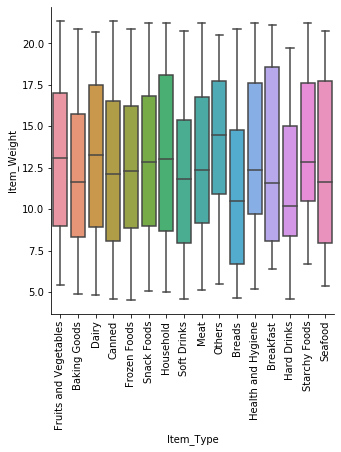

In [186]:
#item_weight
chart = sns.catplot(data=df_a,x='Item_Type',y='Item_Weight',kind='box',ci=100)
chart.set_xticklabels(rotation=90)

We can see the weights range of each type of items from the above plot.

In [187]:
#let's fill the nan of weights with the median of each item type
df_a['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [188]:
i1 = df_a[df_a['Item_Type']=='Fruits and Vegetables']
i2 = df_a[df_a['Item_Type']=='Snack Foods']
i3 = df_a[df_a['Item_Type']=='Household']
i4 = df_a[df_a['Item_Type']=='Frozen Foods']
i5 = df_a[df_a['Item_Type']=='Dairy']
i6 = df_a[df_a['Item_Type']=='Baking Goods']
i7 = df_a[df_a['Item_Type']=='Canned']
i8 = df_a[df_a['Item_Type']=='Health and Hygiene']
i9 = df_a[df_a['Item_Type']=='Meat']
i10 = df_a[df_a['Item_Type']=='Soft Drinks']
i11 = df_a[df_a['Item_Type']=='Breads']
i12 = df_a[df_a['Item_Type']=='Hard Drinks']
i13 = df_a[df_a['Item_Type']=='Others']
i14 = df_a[df_a['Item_Type']=='Starchy Foods']
i15 = df_a[df_a['Item_Type']=='Breakfast']
i16 = df_a[df_a['Item_Type']=='Seafood']

In [189]:
q = [i1,i2,i3,i4,i5,i6,i7,i8,i9,i10,i11,i12,i13,i14,i15,i16]
for i in q:
    i['Item_Weight'].fillna(i['Item_Weight'].median(),inplace=True)

In [153]:
# i1['Item_Weight'].fillna(i1['Item_Weight'].median(),inplace=True)
# i2['Item_Weight'].fillna(i2['Item_Weight'].median(),inplace=True)
# i3['Item_Weight'].fillna(i3['Item_Weight'].median(),inplace=True)
# i4['Item_Weight'].fillna(i4['Item_Weight'].median(),inplace=True)
# i5['Item_Weight'].fillna(i5['Item_Weight'].median(),inplace=True)
# i6['Item_Weight'].fillna(i6['Item_Weight'].median(),inplace=True)
# i7['Item_Weight'].fillna(i7['Item_Weight'].median(),inplace=True)
# i8['Item_Weight'].fillna(i8['Item_Weight'].median(),inplace=True)
# i9['Item_Weight'].fillna(i9['Item_Weight'].median(),inplace=True)
# i10['Item_Weight'].fillna(i10['Item_Weight'].median(),inplace=True)
# i11['Item_Weight'].fillna(i11['Item_Weight'].median(),inplace=True)
# i12['Item_Weight'].fillna(i12['Item_Weight'].median(),inplace=True)
# i13['Item_Weight'].fillna(i13['Item_Weight'].median(),inplace=True)
# i14['Item_Weight'].fillna(i14['Item_Weight'].median(),inplace=True)
# i15['Item_Weight'].fillna(i15['Item_Weight'].median(),inplace=True)
# i16['Item_Weight'].fillna(i16['Item_Weight'].median(),inplace=True)

In [190]:
df_fin = pd.concat([i1,i2,i3,i4,i5,i6,i7,i8,i9,i10,i11,i12,i13,i14,i15,i16],join='outer',axis=0)
df_fin.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
dtype: int64

We can see that all the nan's has been removed.

In [155]:
#converting object types to int types
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 3 to 4622
Data columns (total 12 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  14204 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  14204 non-null object
Outlet_Type                  14204 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [156]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [157]:
df_fin['Item_Fat_Content']=le.fit_transform(df_fin['Item_Fat_Content'])
df_fin['Item_Type'] = le.fit_transform(df_fin['Item_Type'])
df_fin['Outlet_Establishment_Year'] = le.fit_transform(df_fin['Outlet_Establishment_Year'])
df_fin['Outlet_Location_Type'] = le.fit_transform(df_fin['Outlet_Location_Type'])
df_fin['Outlet_Size'] = le.fit_transform(df_fin['Outlet_Size'])
df_fin['Outlet_Type'] = le.fit_transform(df_fin['Outlet_Type'])

In [158]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 3 to 4622
Data columns (total 12 columns):
Item_Fat_Content             14204 non-null int32
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null int32
Item_Visibility              14204 non-null float64
Item_Weight                  14204 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null int32
Outlet_Size                  14204 non-null int32
Outlet_Type                  14204 non-null int32
dtypes: float64(4), int32(5), int64(1), object(2)
memory usage: 1.1+ MB


In [159]:
df_fin.corr()['Item_Outlet_Sales']

Item_Fat_Content             0.009800
Item_MRP                     0.567574
Item_Outlet_Sales            1.000000
Item_Type                    0.017048
Item_Visibility             -0.128625
Item_Weight                  0.009472
Outlet_Establishment_Year   -0.025525
Outlet_Location_Type         0.089367
Outlet_Size                 -0.162753
Outlet_Type                  0.401522
Name: Item_Outlet_Sales, dtype: float64

We can drop item_identifier and outlet_identifier since they doesn't make much sense in predicting the outcome.

In [167]:
df_fin.drop(columns=['Item_Identifier','Outlet_Identifier'],inplace=True)

# Data Modelling:

In [168]:
dftrain = df_fin[df_fin['Item_Outlet_Sales'].isnull() != True]
dftest = df_fin[df_fin['Item_Outlet_Sales'].isnull() == True]

In [169]:
dftrain.shape,dftest.shape 

((8523, 10), (5681, 10))

In [110]:
#training data
x1 = dftrain.drop(columns='Item_Outlet_Sales')
y1 = dftrain['Item_Outlet_Sales']

In [111]:
#testing data
x2 = dftest.drop(columns='Item_Outlet_Sales')
y2 = dftest['Item_Outlet_Sales']

In [119]:
#importing algorithms
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [125]:
LR1 = LinearRegression()
knn = KNeighborsRegressor() 
DT = DecisionTreeRegressor()
RF = RandomForestRegressor()
bag = BaggingRegressor(n_estimators=10)
adaboost = AdaBoostRegressor(n_estimators=50)
adaboost_rf = AdaBoostRegressor(base_estimator=RF,n_estimators=50)
grad = GradientBoostingRegressor(n_estimators=100)

In [126]:
models = []
models.append(('Linear Regression',LR1))
models.append(('KNN',knn))
models.append(('Decision Tree',DT))
models.append(('Random Forrest',RF))
models.append(('Bagged DT',bag))
models.append(('Ada Boost DT',adaboost))
models.append(('Ada boost Random Forrest',adaboost_rf))
models.append(('Gradient boosting',grad))

In [127]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=7,shuffle=True,random_state=0)
    cv_results = model_selection.cross_val_score(model,x1,y1,cv=kfold,scoring='neg_mean_squared_error')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print('%s: %f (%f)' % (name,np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)))))

Linear Regression: 1205.629165 (30.177393)
KNN: 1309.182219 (25.370095)
Decision Tree: 1518.303116 (37.113131)
Random Forrest: 1177.739727 (22.507112)
Bagged DT: 1183.305480 (26.005374)
Ada Boost DT: 1227.887656 (45.637798)
Ada boost Random Forrest: 1152.367955 (17.974468)
Gradient boosting: 1083.176437 (19.073420)


In [128]:
# # grid search
# n_estimators = range(1, 100)
# param_grid = dict(n_estimators=n_estimators)
# r_search = RandomizedSearchCV(grad, param_grid,scoring="neg_mean_squared_error", n_jobs=-1, cv=5)
# r_search.fit(x1,y1)
#r_search.best_params_

In [129]:
grad.fit(x1,y1)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [134]:
#predicting test data
ypred = grad.predict(x2)
p=pd.DataFrame(ypred)
p.columns = ['Item_Outlet_Sales']

In [162]:
q=dftest['Item_Identifier']
r=dftest['Outlet_Identifier']

In [165]:
df_finalz = pd.concat([q,r,p],axis=1)
df_finalz

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,333.438986
1,FDW14,OUT017,371.094967
2,NCN55,OUT010,595.997420
3,FDQ58,OUT017,16.514681
4,FDY38,OUT027,225.622527
5,FDH56,OUT046,279.396739
6,FDL48,OUT018,47.161169
7,FDC48,OUT027,386.899162
8,FDN33,OUT045,258.419439
9,FDA36,OUT017,499.005635


In [166]:
df_finalz.shape

(5681, 3)

In [170]:
df_finalz.to_csv('Predicted Item Outlet Sale')